# Geospatial Tutorial

### Data Format

As always when thinking about digital methods, start from the *method*, not the software. Software comes and goes, the core logic stays the same. So: what do we need in order to model data in geographic space? To put a point on a map, all we need is the lattitude and longitude. For most geospatial software, you can add this information "by hand," but in practice you will generally be *importing* a dataset. Two common formats for importing geospatial data are: GeoJSON and CSV (comma separated values).

In principle, this is enough data to import into something like QGIS or ArcGIS and produce a map (which would consist of a single point on a map):

| Latitude | Longitude |
|----------|-----------|
| 40.7128 | 74.0060 |

Recall, the above table is the *rendered* version of raw CSV:

```
Latitude,Longitude
40.7128° N,74.0060° W
```

A more "realistic" dataset you might keep for historical purposes could look like this:

| Latitude | Longitude | Place_Name | Population |
|----------|-----------|------------|------------|
| 40.7128° N | 74.0060° W | New York City, USA | 8,804,190 |
| 35.6762° N | 139.6503° E | Tokyo, Japan | 13,929,286 |
| 51.5074° N | 0.1278° W | London, UK | 8,982,000 |
| 33.8688° S | 151.2093° E | Sydney, Australia | 5,367,206 |
| 1.3521° N | 103.8198° E | Singapore | 5,685,807 |


When you import this data, you would have to make sure that whatever software you are using knows that the first column corresponds to the Y axis and the second to the X axis: most software packages will assume that any remaining columns are *attributes*. For instance, once you have your points showing up on your map, you could tell it to use the third column (Place_Name) to label the points, and you could instruct it to use the fourth column (Population) to size the dots as a way of visualizing the cities in relative terms.



### Vectors / Polygons versus Rasters

Before you get started, it's worth pausing to consider an important conceptual distinction in the way a computer codes images. If you take a picture with your phone, you are producing a *raster* image, which is made up of a grid of pixels (or cells). If you zoom in, the picture will become grainy as you get closer to the pixels.

A *vector* or *polygon* shape is fundamentally different: essentially, a vector image is a collection of points in space, which the computer joins together with a line. Therefore, if you have three points in space, you already have a vector graphic.



### Databases and Concatenating Tables

If your research goal is to simply track places with some sort of information attached to those places in a one-to-one relationship, then all you need is a CSV file similar to the example above. However, for many historical research projects, you will need to join information kept in separate tables.

For instance: what if determining the likely location of a historical location is itself a research finding, and you have multiple attested locations that you are tracking at the same time? In this case, you would likely be maintaining one table for location entities, and another table for location attributes -- and the latter table could track multiple attested coordinates for a given location.


Table 1: Locations

| Location_ID | Location_Name |
|-------------|---------------|
| L001 | Alexandria |
| L002 | Timbuktu |
| L003 | Tenochtitlan |


Table 2: Location Coordinates

| Location_ID | Latitude | Longitude |
|-------------|----------|-----------|
| L001 | 31.2001° N | 29.9187° E |
| L001 | 31.1855° N | 29.8962° E |
| L001 | 31.2156° N | 29.9090° E |
| L002 | 16.7666° N | 3.0026° W |
| L003 | 19.4326° N | 99.1332° W |


Or, even if you are certain of all your locations (i.e., you can just keep them as columns in one single table), what if you want to keep track of the travel itineraries of individuals, i.e., who went where? In that case, you would need a table for locations, a table for individuals, and then a join table connecting them.


Table 1: Historical Figures

| Person_ID | Person_Name | Lifetime |
|-----------|-------------|----------|
| P001 | Marco Polo | 1254-1324 |
| P002 | Ibn Battuta | 1304-1369 |
| P003 | Zheng He | 1371-1433 |


Table 2: Locations

| Location_ID | Location_Name | Region |
|-------------|---------------|--------|
| L001 | Venice | Italy |
| L002 | Constantinople | Byzantine Empire |
| L003 | Beijing | China |
| L004 | Calicut | India |
| L005 | Malacca | Malaysia |


Table 3: Travel Itineraries (Join Table)

| Journey_ID | Person_ID | Location_ID | Visit_Year | Duration_Months | Notes |
|------------|-----------|-------------|------------|-----------------|-------|
| J001 | P001 | L001 | 1271 | 0 | Departure point |
| J002 | P001 | L002 | 1272 | 3 | First major stop |
| J003 | P001 | L003 | 1275 | 204 | Served Kublai Khan |
| J004 | P002 | L002 | 1325 | 4 | Pilgrimage stop |
| J005 | P002 | L004 | 1342 | 6 | Trading port visit |
| J006 | P003 | L003 | 1405 | 0 | Departure point |
| J007 | P003 | L004 | 1407 | 2 | Diplomatic mission |
| J008 | P003 | L005 | 1409 | 3 | Established relations |


You already know how to stitch together tables using the Pandas library in Python [from a previous lesson](https://github.com/pickettj/teaching/blob/main/Pandas_Relational_Tables.ipynb). We will follow very similar steps to produce an output file of interesting historical-geographical data ready for import into a geospatial software package.

### Concatenating Tables for Geospatial Import

Let's start the walkthrough: you can follow along with the [provided sample CSV files](https://github.com/pickettj/teaching/tree/main/geospatial_sample_data).

In [2]:
# Import the pandas library and give it the nickname 'pd'
import pandas as pd

In [6]:
# Read in the data as a "dataframe" (i.e., the tabular data format in Pandas)

df_people = pd.read_csv("./geospatial_sample_data/people.csv")
df_locations = pd.read_csv("./geospatial_sample_data/locations.csv")
df_journeys = pd.read_csv("./geospatial_sample_data/journeys.csv")

# note that the dot in ./geospatial... means "start in the current location 
# of your computer directory system and then look for a directory called..."
# this is why if you pull or download this code from Github, the path (file location)
# will work on your computer even though your "absolute path" will be different from the
# one on my computer
# see: https://phoenixnap.com/kb/absolute-path-vs-relative-path

In [12]:

# Merge df_journeys with df_locations
merged_with_locations = pd.merge(df_journeys, df_locations, left_on='Location_ID', right_on='UID', how='left')

# Merge the result with df_people
final_merged_df = pd.merge(merged_with_locations, df_people, left_on='Person_ID', right_on='UID', how='left')


In [13]:
# Clean up some of the redunand columnss: Drop the redundant columns UID_x and UID_y
final_cleaned_df = final_merged_df.drop(columns=['UID_x', 'UID_y'])

# Display the cleaned DataFrame
final_cleaned_df

,Location_ID,Person_ID,Year,Place_Name,Latitude,Longitude,Person_Name,Birth_Year,Death_Year
0,L001,P001,1271,Venice,45.4408,12.3155,Marco Polo,1254,1324
1,L002,P001,1272,Constantinople,41.0082,28.9784,Marco Polo,1254,1324
2,L007,P001,1274,Baghdad,33.3152,44.3661,Marco Polo,1254,1324
3,L008,P001,1275,Samarkand,39.6270,66.9750,Marco Polo,1254,1324
4,L003,P001,1275,Beijing,39.9042,116.4074,Marco Polo,1254,1324
...,...,...,...,...,...,...,...,...,...
112,L045,P001,1295,Trabzon,41.0027,39.7178,Marco Polo,1254,1324
113,L002,P001,1295,Constantinople,41.0082,28.9784,Marco Polo,1254,1324
114,L024,P001,1296,Genoa,44.4056,8.9463,Marco Polo,1254,1324
115,L034,P001,1300,Palermo,38.1157,13.3615,Marco Polo,1254,1324


Voila! And so we already have interesting data ready to use. To review:
Our join table, `df_journeys`, had two columns representing *foreign keys*: `Location_ID` and `Person_ID`. Those columns each had a one-to-many relationship to the `UID` columns in their respecting corresponding tables. We joined them into one single table with all the information in a single place so we can use it for our geospatial visualizations.

> Note that we could have just maintained one single table all along. That would have saved us from having to understand foreign keys, join tables, and how relational databses work. However, that would also have meant maintaining redundant information: Marco Polo is always born in 1254, and if you reproduce that data manually every single time in the join table, you open yourself up to user-error. With the workflow above, you can worry about tracking information about people / places separately, and simply re-run the merge to update your map.

Next, if we want to use this merged table outside of the Python environment, we need to export it back into a CSV table, which is fairly straightforward:

In [16]:
# Export final_cleaned_df to a CSV file
final_cleaned_df.to_csv('./geospatial_sample_data/final_cleaned_data.csv', index=False)

You should now have a file on your hardrive called `final_cleaned_data.csv`. You can [import this directly into QGIS](https://www.qgistutorials.com/en/docs/3/importing_spreadsheets_csv.html) (or any other geospatial software pacakge).

### Next steps and other considerations

The above methods will get you to a set of points on a map with some assocaited attributes you can style... which is pretty good! Programs like QGIS allow you to use something like Google Maps as a backdrop layer so that you can see where they fall on a modern global map.

But what if you want full control over the geographical features that your map displays? For that, you might start by downloading some *shape files*. Shape files come in various formats, and are vectors / polygons, which means they are essentially a series of connected points in space. You only need three points to make a polygon, but in practice the level of detail necessary to define a shoreline, for instance, would entail hundreds of thousands of points. Fortunately, you can download most [natural features](https://www.naturalearthdata.com/downloads/), and [modern political boundaries](https://www.geoboundaries.org/index.html#getdata), online and then simply import them into your map as a layer. (In QGIS, for instance, all you need to do is drag the file onto your map.)

But what if you want to create your own shape files? For instance, the Aral Sea looked a lot different a hundred years ago now, and the modern boundaries of Saudi Arabia are not terribly relevant if you are studying the Ottoman Empire. For well-studied topics, you may also be able to download historical shapefiles from existing digital mapping projects (for instance, through something like the [World Historical Gazetteer](https://whgazetteer.org/). But in practice, you may need to make your own.

Quite often this involves georeferencing: essentially, you take a raster image (e.g., of a historical map), "stretch" it over actual coordinates, and then tracing a polygon. Essentially, you are converting pixels into coordinates.

There are a number of different tools for doing this. In practice, the process is both fun (because it's kind of like drawing!), but also frustrating (because a lot of the software is rather buggy). Youc can read about the tool [QGIS offers for this here](https://docs.qgis.org/3.40/en/docs/user_manual/working_with_raster/georeferencer.html), but you can also georeference a raster image in another program ([for instance](https://lincolnmullen.com/projects/spatial-workshop/georectification.html)) and import it as a layer in QGIS. (A georeferenced raster image encodes geospatial coordinates onto the image itself, such that when you import it, the image is already in the right place on your map.)



### Geopandas

The steps above led to an exported CSV file, which can be imported into a GUI like QGIS or ArcGIS. However, you could also work with the data directly within Python by importing a specialized library.

In [26]:
import geopandas
import matplotlib.pyplot as plt
from shapely.geometry import Point


The [Python library Geopandas](https://geopandas.org/en/stable/getting_started/introduction.html) comes with a specialized data type: the GeoDataFrame. Essentially, this is a table (like a normal dataframe or CSV file) reserved columns for geospatial information. Our dataframe already has Latitude and Longitude columns: but we need to convert it into a GeoDataFrame. (This step is functionally similar to importing the data into something like QGIS when you tell the program which columns correspond to X and Y axes.)

In [20]:

# Create a geometry column from the Longitude and Latitude columns
geometry = [Point(xy) for xy in zip(final_cleaned_df['Longitude'], final_cleaned_df['Latitude'])]
# The zip function in Python is used to combine two or more iterables (like lists or columns from a DataFrame) into a single iterable of tuples.

# Create a GeoDataFrame
geo_final_cleaned_df = gpd.GeoDataFrame(final_cleaned_df, geometry=geometry)

# Set the coordinate reference system (CRS) to WGS84 (EPSG:4326)
geo_final_cleaned_df.set_crs(epsg=4326, inplace=True)

# Display the GeoDataFrame
geo_final_cleaned_df

,Location_ID,Person_ID,Year,Place_Name,Latitude,Longitude,Person_Name,Birth_Year,Death_Year,geometry
0,L001,P001,1271,Venice,45.4408,12.3155,Marco Polo,1254,1324,POINT (12.3155 45.4408)
1,L002,P001,1272,Constantinople,41.0082,28.9784,Marco Polo,1254,1324,POINT (28.9784 41.0082)
2,L007,P001,1274,Baghdad,33.3152,44.3661,Marco Polo,1254,1324,POINT (44.3661 33.3152)
3,L008,P001,1275,Samarkand,39.6270,66.9750,Marco Polo,1254,1324,POINT (66.975 39.627)
4,L003,P001,1275,Beijing,39.9042,116.4074,Marco Polo,1254,1324,POINT (116.4074 39.9042)
...,...,...,...,...,...,...,...,...,...,...
112,L045,P001,1295,Trabzon,41.0027,39.7178,Marco Polo,1254,1324,POINT (39.7178 41.0027)
113,L002,P001,1295,Constantinople,41.0082,28.9784,Marco Polo,1254,1324,POINT (28.9784 41.0082)
114,L024,P001,1296,Genoa,44.4056,8.9463,Marco Polo,1254,1324,POINT (8.9463 44.4056)
115,L034,P001,1300,Palermo,38.1157,13.3615,Marco Polo,1254,1324,POINT (13.3615 38.1157)


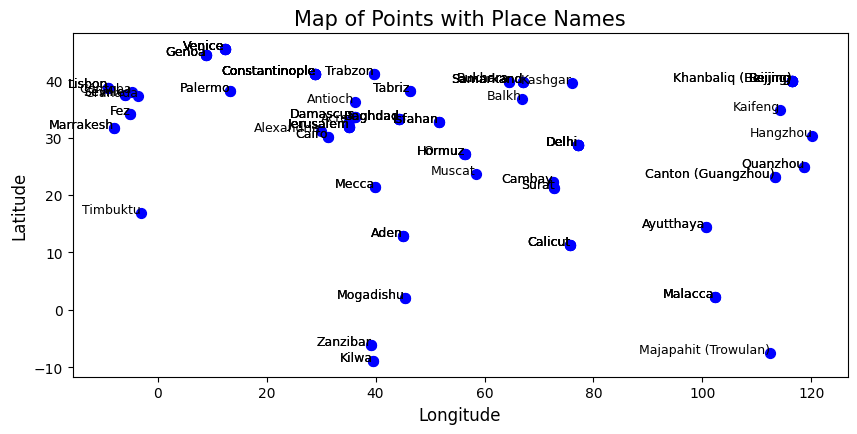

In [ ]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))  # Set the figure size

# Plot the points without color coding
geo_final_cleaned_df.plot(ax=ax, color='blue', markersize=50)  # Adjust markersize as needed

# Add labels for each point using Place_Name
for x, y, label in zip(geo_final_cleaned_df.geometry.x, geo_final_cleaned_df.geometry.y, geo_final_cleaned_df['Place_Name']):
    ax.text(x, y, label, fontsize=9, ha='right')  # Adjust fontsize and alignment as needed

# Set title and labels
ax.set_title('Map of Points with Place Names', fontsize=15)


# Show the plot
plt.show()

The points are showing up in what seems to be their correct geographic 